In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
portfolio = pd.read_csv('../data/sample-portfolio.csv')
portfolio

,Ticker,Weight
0,AAPL,0.30
1,MSFT,0.25
2,GOOGL,0.20
3,TSLA,0.15
4,NVDA,0.10


In [7]:
tickers = portfolio['Ticker'].tolist()
start_date = '2022-01-01'
end_date = '2025-06-30'

data = yf.download(tickers, start=start_date, end=end_date)['Close']

data.head()

C:\Users\sheeb\AppData\Local\Temp\ipykernel_12848\67426440.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,GOOGL,MSFT,NVDA,TSLA
Date,,,,,
2022-01-03,178.645645,144.127121,325.038086,30.066137,399.926666
2022-01-04,176.378357,143.538651,319.464600,29.236650,383.196655
2022-01-05,171.686707,136.953644,307.201019,27.553719,362.706665
2022-01-06,168.820679,136.926315,304.773560,28.126669,354.899994
2022-01-07,168.987549,136.200165,304.928955,27.197367,342.320007


In [8]:
print(data.isnull().sum())
# Or to see if any missing values exist
print(data.isnull().any())
# To see the total number of missing values
print(data.isnull().sum().sum())
# ...existing code...

Ticker
AAPL     0
GOOGL    0
MSFT     0
NVDA     0
TSLA     0
dtype: int64
Ticker
AAPL     False
GOOGL    False
MSFT     False
NVDA     False
TSLA     False
dtype: bool
0


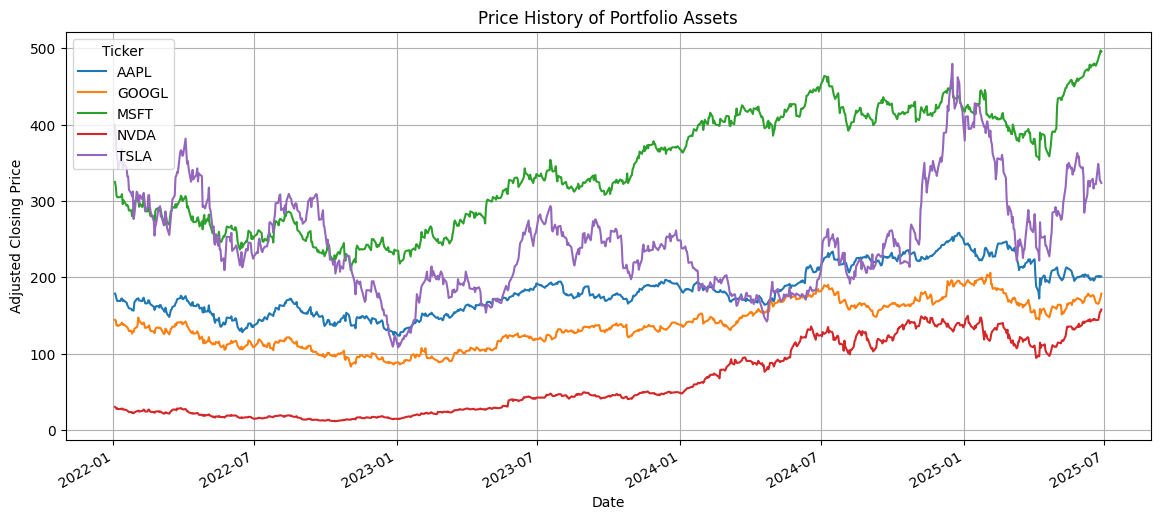

In [9]:
data.plot(figsize=(14,6), title="Price History of Portfolio Assets")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.show()
# Calculate daily returns

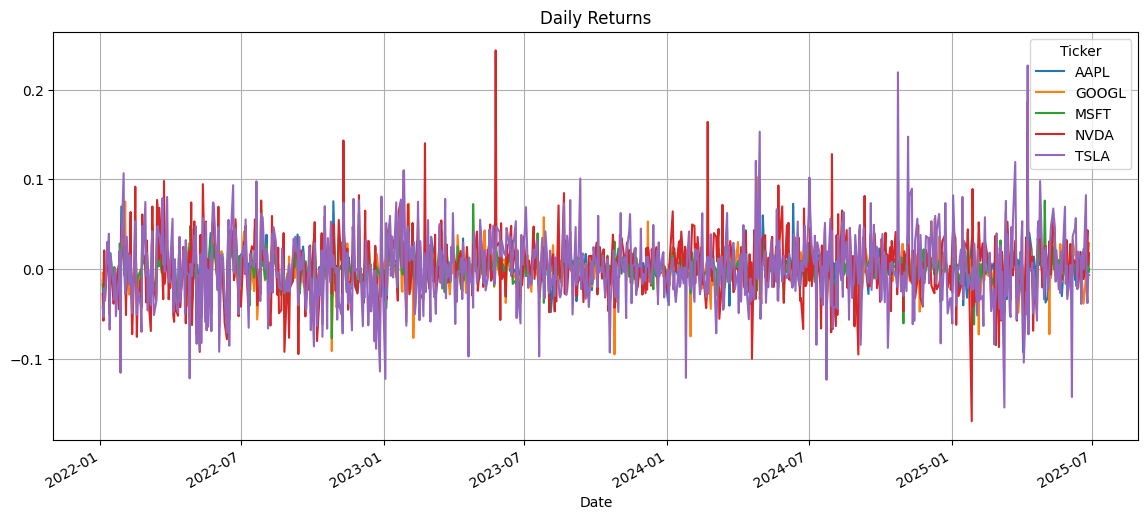

In [10]:
daily_returns = data.pct_change().dropna()
daily_returns.plot(figsize=(14,6), title="Daily Returns")
plt.grid(True)